In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [7]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
x = df.drop(['sales'], axis=1)
y = df.sales

In [9]:
polynomial_converter = PolynomialFeatures(include_bias=False)

In [11]:
polynomial_converter.fit(x)
poly_features = polynomial_converter.transform(x)

# poly_features = polynomial_converter.fit_transform(x)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=.2)
model = LinearRegression()

In [15]:
model.fit(x_train, y_train)

LinearRegression()

In [17]:
pred = model.predict(x_test)

In [18]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
print(f'MAE: {mae}\nMSE: {mse}\nRMSE: {mse**.5}')

MAE: 0.4956466834913316
MSE: 0.3732793967358058
RMSE: 0.6109659538270572


In [19]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 11):
    polynomial_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = polynomial_converter.fit_transform(x)

    x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=.2)
    model = LinearRegression()

    model.fit(x_train, y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    train_rmse_errors.append(mean_squared_error(y_train, train_pred) **.5)
    test_rmse_errors.append(mean_squared_error(y_test, test_pred) **.5)

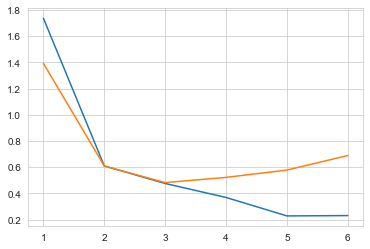

In [25]:
plt.plot(range(1, 7), train_rmse_errors[:6], label='Train RMSE')
plt.plot(range(1, 7), test_rmse_errors[:6], label='Test RMSE')